# Python Project

**Hotel**

The program must present and display a report of the result obtained, showing for
each strategy the number of customers accommodated, the number of rooms occupied, the
number of different hotels occupied, the total volume of business (total earnings of each
hotel), and the degree of customer satisfaction (calculated according to the location of the
hotel assigned to them with respect to their preferences).
I will use 4 differents strategies:
**1-random**
**2-customer preference**
**3-price**
**4-availability**

**Random:**
customers are randomly distributed to the rooms until the seats or customers
are exhausted.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing useful library for python

from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
#I'm taking all the excel file that i need to manipulate and use for obtain the final result
hotel_ex['stanze_disponibili'] = hotel_ex['rooms'].copy()
#creating a colunm that rapresent the room available
guadagni_hotel={hotel: 0 for hotel in hotel_ex['hotel']}
##dictionary for the earnings of each hotel
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
#creating the variables needed and the set for hotel that are occupied and a list for allocations 
for _, guest_row in guest_ex.iterrows():
    #we are iterating on every row of guest escluding the first that are the index
    
    guest=guest_row['guest']
    discount=guest_row['discount']
    #ww are taking from each row the value of the colunm in square brakets and we are assigning to a variable
    
    preferenze_ospite=preferences_ex[preferences_ex['guest']== guest]
    #filtering 'preferenze' in order to associate to a guest only his preferences 
    
    hotels_preferiti=preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    #filtring for hotel that has at least 1 room available and control that this hotel is in the preferences of the guest
    
    if not hotels_preferiti.empty:
        hotel_selezionato= np.random.choice(hotels_preferiti['hotel'])
        ospiti_soddisfatti += 1
    else:
        hotels_disponibili=hotel_ex[hotel_ex['stanze_disponibili']>0]
        if hotels_disponibili.empty:
            print('Non ci sono hotel disponibili')
            continue 
        hotel_selezionato= np.random.choice(hotels_disponibili['hotel'])
    #this loop assign to the guest a random hotel in his preferences if it is possible, in other case it gives one random that is free, if that is not possible he won't have the room
    
    prezzo_hotel= hotel_ex[hotel_ex['hotel']==hotel_selezionato].iloc[0]
    price=prezzo_hotel['price']
    #i take the row of the hotel that is selected and than asssign to price the value of the colunm price in the row of the hotel chosen
    
    prezzo_finale= price*(1-discount)
    #calculete the discount on the final price 
    
    allocazioni.append({
        'cliente':guest,
        'hotel_f': hotel_selezionato,
        'prezzo_pagato': prezzo_finale
    })
    #in this way i've all the informations, that i need, matched 
    
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    hotel_ex.loc[indice_hotel, 'stanze_disponibili'] -= 1
    #i'm associating to each hotel selected his index
    #thanks to .loc i'm searching by using 'indice_hotel' and reducing by 1 'stanze_disponibili' when we assign one
    
    ospiti_allocati += 1
    stanze_occupate += 1
    hotel_occupati.add(hotel_selezionato)
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    #updating after allocate a guest    
allocazioni_df= pd.DataFrame(allocazioni)  
#creating the dataframe for allocations
numero_hotel_occupati= len(hotel_occupati)
print(f'Numero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Ospiti soddisfatti: {ospiti_soddisfatti}')
#printing the result that i was searching for
guadagni_df= pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno Totale'])
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df)

Numero di ospiti che hanno ottenuto una camera: 4000
Numero di stanze occupate: 4000
Numero di hotel occupati: 400
Ospiti soddisfatti: 3979

Guadagni totali di ogni hotel:
         Hotel  Guadagno Totale
0      hotel_1          3251.43
1      hotel_2           565.80
2      hotel_3          1446.66
3      hotel_4          2290.63
4      hotel_5          1886.34
..         ...              ...
395  hotel_396           954.00
396  hotel_397           760.24
397  hotel_398          1197.48
398  hotel_399          2609.96
399  hotel_400          1829.90

[400 rows x 2 columns]


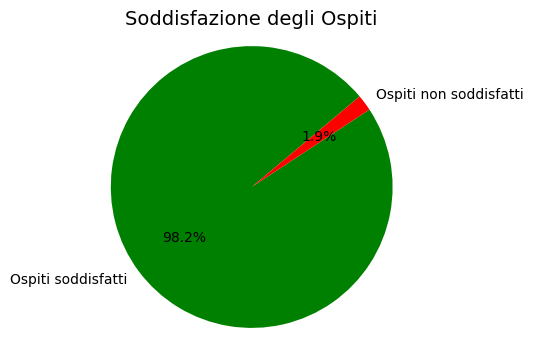

In [19]:
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
sizes = [ospiti_soddisfatti, 4000-ospiti_soddisfatti]
colors = ['green', 'red']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
plt.title('Soddisfazione degli Ospiti', fontsize=14)
plt.axis('equal')  
plt.show()
# creating a plot that shows how many guest were satisfied accordin to their preferences
#.figure create the figure considering the size that i choose
#.axis to have the circle
#.title the title of the graph
#.show just show the image


**Customer preference:**
customers are served in order of reservation (the customer
number indicates the order) and are allocated to the hotel based on their preference,
until the seats or customers are exhausted.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
hotel_ex['stanze_disponibili']= hotel_ex['rooms'].copy()
guadagni_hotel= {hotel: 0 for hotel in hotel_ex['hotel']}
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
for _, guest_row in guest_ex.iterrows():
    ##iterrows serve per iterare su ogni riga in questo caso l'indice è _ e la riga è guest_row
    guest=guest_row['guest']
    discount=guest_row['discount']
    
    ##devo tener conto delle preferenze degli ospiti
    preferenze_ospite= preferences_ex[preferences_ex['guest']==guest]
    
    ##devo trovare stanze disponibili nelle preferenze del cliente
    hotels_preferiti= preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    ## isin appunto serve per verificare se ciascun elemento di una colonna o di un DataFrame è presente in una lista di valori specificati
    ## in questo caso infatti stiamo cercando tra le preferenze del cliente un hotel che abbia almeno una stanza disponibile
    
    if not hotels_preferiti.empty:
        ##se ci sono preferenze disponibili selezioniamo il primo hotel preferito cond disponibilità
        hotel_selezionato= hotels_preferiti.iloc[0]['hotel']
        ospiti_soddisfatti += 1 ##così aggiungo un ospite a quelli soddisfatti   
    else:
        ##se non ci sono preferenze valide saltiamo l'ospite e non lo allochiamo
        continue
    
    
    ##devo prendere il prezzo dell'hotel selezionato
    ## iloc mi serve per accedere a righe e colonne in base alla posizione numerica (intger location) 
    ## in questo caso usiamo l'indice zero percchè ci serve il prezzo dell'hotel selezionato appunto
    prezzo_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].iloc[0]
    price=prezzo_hotel['price']
    
    ##calcolo lo sconto
    prezzo_finale= price*(1-discount)
    
    ##considero sempre le allocazioni
    allocazioni.append({
        'cliente': guest,
        'hotel_f':hotel_selezionato,
        'prezzo_pagato':prezzo_finale
        })
    ##riduco il numero di stanze disponibili
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    hotel_ex.loc[indice_hotel, 'stanze_disponibili']-=1 
    ## loc invece serve per avere un risultato in base ai nomi di righe e colonne invece che l'indice numerico come fa iloc
    
    ##aggiorno le statistiche
    ospiti_allocati += 1
    stanze_occupate += 1
    hotel_occupati.add(hotel_selezionato)
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    
    ##se tutti gli hotel sono pieni interrompo l'allocazione
    if hotel_ex['stanze_disponibili'].sum() == 0:
        print('Tutte le stanze sono occupate.')
        break
allocazioni_df_2=pd.DataFrame(allocazioni)
numero_hotel_occupati= len(hotel_occupati)
print(f'Numero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Numero di ospiti soddisfatti: {ospiti_soddisfatti}')
guadagni_df_2= pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno totale'])
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df_2)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df_2)

Numero di ospiti che hanno ottenuto una camera: 3975
Numero di stanze occupate: 3975
Numero di hotel occupati: 400
Numero di ospiti soddisfatti: 3975

Guadagni totali di ogni hotel:
         Hotel  Guadagno totale
0      hotel_1          3128.58
1      hotel_2          1207.96
2      hotel_3           816.39
3      hotel_4          2446.06
4      hotel_5          1904.22
..         ...              ...
395  hotel_396           949.76
396  hotel_397           690.20
397  hotel_398           944.52
398  hotel_399          1533.60
399  hotel_400           653.95

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1  hotel_168         271.18
1        guest_2  hotel_369         133.00
2        guest_3  hotel_157          60.45
3        guest_4  hotel_235         136.00
4        guest_5  hotel_121          50.40
...          ...        ...            ...
3970  guest_3996  hotel_350          56.00
3971  guest_3997   hotel_19          96

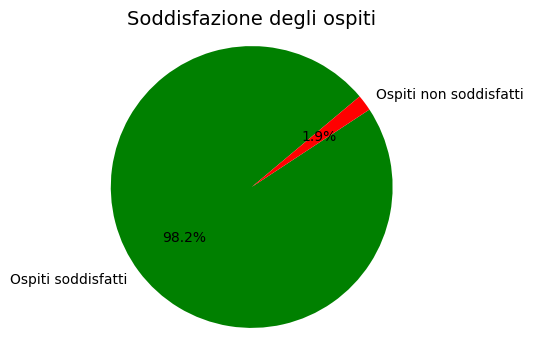

In [17]:
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
sizes = [ospiti_soddisfatti, 4000-ospiti_allocati]
colors = ['green', 'red']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
plt.title('Soddisfazione degli ospiti', fontsize=14)
plt.axis('equal')  
plt.show()

**Price:**
the places in the hotel are distributed in order of price, starting with the cheapest
hotel and following in order of reservation and preference until the places or customers
are exhausted.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
hotel_ex['stanze_disponibili']=hotel_ex['rooms'].copy()
hotel_ex=hotel_ex.sort_values(by='price')
guadagni_hotel= {hotel: 0 for hotel in hotel_ex['hotel']}
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
for _, guest_row in guest_ex.iterrows():
    guest=guest_row['guest']
    discount=guest_row['discount']
    preferenze_ospite = preferences_ex[preferences_ex['guest'] == guest]
    hotels_preferiti=preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    if not hotels_preferiti.empty:
        hotels_preferiti=hotels_preferiti.merge(hotel_ex[['hotel', 'price']], on='hotel').sort_values(by='price')
        hotel_selezionato=hotels_preferiti.iloc[0]['hotel']
        if hotel_selezionato in preferenze_ospite['hotel'].values:
            ospiti_soddisfatti += 1
    else:
        continue
    prezzo_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].iloc[0]['price']
    prezzo_finale=prezzo_hotel*(1-discount)
    allocazioni.append({
        'cliente':guest,
        'hotel_f':hotel_selezionato,
        'prezzo_pagato':prezzo_finale
    })
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    hotel_ex.loc[indice_hotel, 'stanze_disponibili'] -=1
    ospiti_allocati+=1
    stanze_occupate+=1
    hotel_occupati.add(hotel_selezionato)
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    if hotel_ex['stanze_disponibili'].sum()==0:
        print('Stanze sold out')
        break
allocazioni_df_3 = pd.DataFrame(allocazioni)
numero_hotel_occupati= len(hotel_occupati)
print(f'Nuero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Numero di ospiti soddisfatti: {ospiti_soddisfatti}')
guadagni_df_3=pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno Totale'])
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df_3)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df_3)

Nuero di ospiti che hanno ottenuto una camera: 3926
Numero di stanze occupate: 3926
Numero di hotel occupati: 388
Numero di ospiti soddisfatti: 3926

Guadagni totali di ogni hotel:
         Hotel  Guadagno Totale
0    hotel_190           465.00
1     hotel_49           860.50
2    hotel_354           579.80
3    hotel_301           299.00
4     hotel_24           428.77
..         ...              ...
395  hotel_184             0.00
396    hotel_5             0.00
397  hotel_168           265.22
398  hotel_230             0.00
399   hotel_27           254.15

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1   hotel_22          55.51
1        guest_2   hotel_26          55.00
2        guest_3    hotel_6          53.94
3        guest_4  hotel_321          54.00
4        guest_5  hotel_121          50.40
...          ...        ...            ...
3921  guest_3996  hotel_115         244.00
3922  guest_3997  hotel_147         213.

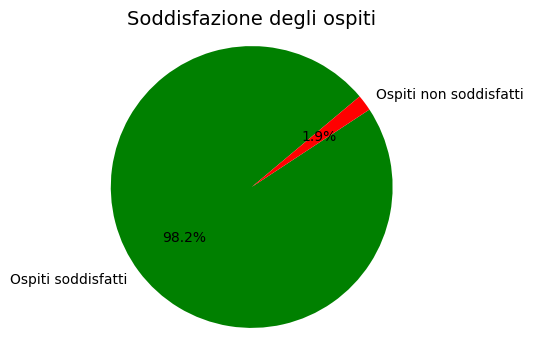

In [15]:
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
sizes = [ospiti_soddisfatti, 4000-ospiti_soddisfatti]
colors = ['green', 'red']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
plt.title('Soddisfazione degli ospiti', fontsize=14)
plt.axis('equal')  
plt.show()

**Availability:**
places in hotels are distributed in order of room availability, starting with the
most roomy hotel and subordinately in order of reservation and preference until places
or clients are exhausted.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modu import carica_file
hotel_ex, guest_ex, preferences_ex = carica_file()
hotel_ex['stanze_disponibili']=hotel_ex['rooms'].copy()
hotel_ex=hotel_ex.sort_values(by='stanze_disponibili', ascending=False)
guadagni_hotel={hotel: 0 for hotel in hotel_ex['hotel']}
from modu import stats
ospiti_allocati, stanze_occupate, hotel_occupati, ospiti_soddisfatti, allocazioni = stats()
for _, guest_row in guest_ex.iterrows():
    guest=guest_row['guest']
    discount=guest_row['discount']
    preferenze_ospite=preferences_ex[preferences_ex['guest']==guest]
    hotels_preferiti=preferenze_ospite[preferenze_ospite['hotel'].isin(hotel_ex[hotel_ex['stanze_disponibili']>0]['hotel'])]
    if not hotels_preferiti.empty:
        hotels_preferiti=hotels_preferiti.merge(hotel_ex[['hotel', 'stanze_disponibili']], on='hotel').sort_values(by='stanze_disponibili', ascending=False)
        hotel_selezionato=hotels_preferiti.iloc[0]['hotel']
        ospiti_soddisfatti += 1 
    else:
        continue
    prezzo_hotel=hotel_ex[hotel_ex['hotel']== hotel_selezionato].iloc[0]['price']
    prezzo_finale=prezzo_hotel*(1-discount)
    allocazioni.append({
        'cliente':guest,
        'hotel_f':hotel_selezionato,
        'prezzo_pagato':prezzo_finale
    })
    indice_hotel=hotel_ex[hotel_ex['hotel']==hotel_selezionato].index
    hotel_ex.loc[indice_hotel, 'stanze_disponibili'] -= 1
    ospiti_allocati += 1
    guadagni_hotel[hotel_selezionato] += prezzo_finale
    stanze_occupate += 1 
    hotel_occupati.add(hotel_selezionato)
    if hotel_ex['stanze_disponibili'].sum() ==0:
        print('Tutte le stanze sono occupate')
        break
allocazioni_df_4 = pd.DataFrame(allocazioni)
numero_hotel_occupati = len(hotel_occupati)
print(f'Numero di ospiti che hanno ottenuto una camera: {ospiti_allocati}')
print(f'Numero di stanze occupate: {stanze_occupate}')
print(f'Numero di hotel occupati: {numero_hotel_occupati}')
print(f'Numero di ospiti soddisfatti: {ospiti_soddisfatti}')
guadagni_df_4 = pd.DataFrame(list(guadagni_hotel.items()), columns=['Hotel', 'Guadagno totale'])
print('\nGuadagni totali di ogni hotel:')
print(guadagni_df_4)
print('\nAllocazioni degli ospiti:')
print(allocazioni_df_4)

Numero di ospiti che hanno ottenuto una camera: 4000
Numero di stanze occupate: 4000
Numero di hotel occupati: 400
Numero di ospiti soddisfatti: 4000

Guadagni totali di ogni hotel:
         Hotel  Guadagno totale
0     hotel_52          2559.96
1    hotel_114          2760.78
2     hotel_49           776.50
3    hotel_378          3053.56
4    hotel_115          3862.52
..         ...              ...
395  hotel_289           781.75
396  hotel_219           229.10
397  hotel_291           294.25
398   hotel_40           350.84
399  hotel_357           459.36

[400 rows x 2 columns]

Allocazioni degli ospiti:
         cliente    hotel_f  prezzo_pagato
0        guest_1  hotel_129          77.35
1        guest_2  hotel_114         178.00
2        guest_3  hotel_122         155.31
3        guest_4  hotel_394         291.00
4        guest_5  hotel_305          66.60
...          ...        ...            ...
3995  guest_3996  hotel_350          56.00
3996  guest_3997   hotel_19          96

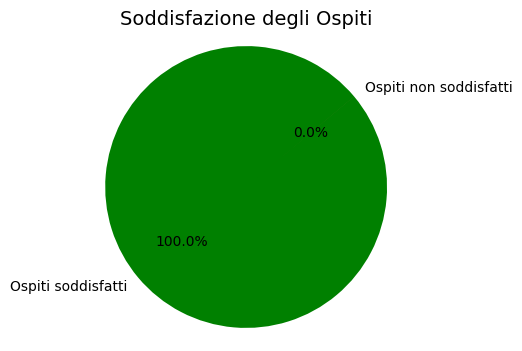

In [ ]:
labels = ['Ospiti soddisfatti', 'Ospiti non soddisfatti']
sizes = [ospiti_soddisfatti, ospiti_allocati-ospiti_soddisfatti]
if sizes[1] == 0:
    sizes[1] = 0.1
colors = ['green', 'red']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=40)
plt.title('Soddisfazione degli Ospiti', fontsize=14)
plt.axis('equal') 
plt.show() 
#I had to put the size of ospiti non soddisfatti as 0.1 because matplot wawsn't able to show the grafic 

**This last graphic shows which method has the best percentage of satisfaction in relation to the different methods required for allocating**

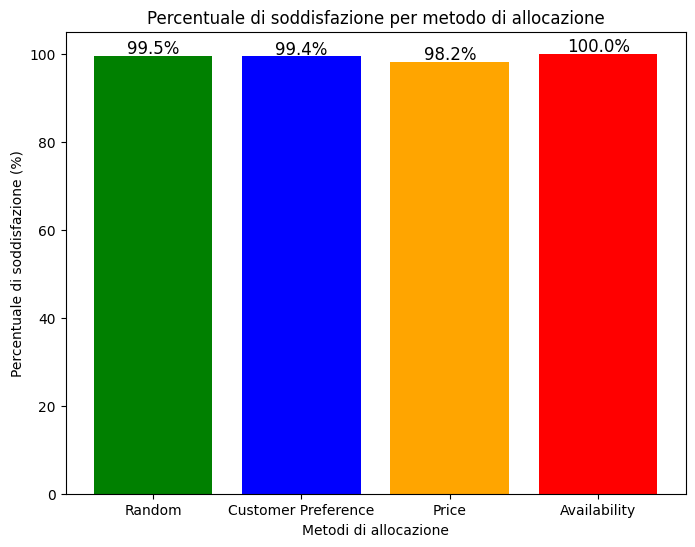

In [33]:
metodi = ['Random', 'Customer Preference', 'Price', 'Availability']
ospiti_soddisfatti = [3979, 3975, 3926, 4000]
ospiti_totali = 4000
percentuale_soddisfatti = [soddisfatti / ospiti_totali * 100 for soddisfatti in ospiti_soddisfatti]
plt.figure(figsize=(8, 6))
plt.bar(metodi, percentuale_soddisfatti, color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Metodi di allocazione')
plt.ylabel('Percentuale di soddisfazione (%)')
plt.title('Percentuale di soddisfazione per metodo di allocazione')
for i in range(len(percentuale_soddisfatti)):
    plt.text(i, percentuale_soddisfatti[i] + 0.5, f'{percentuale_soddisfatti[i]:.1f}%', ha='center', fontsize=12)
plt.show()
